In [17]:
import collections
from io import StringIO

import numpy as np
import pandas as pd
import pydotplus  
import seaborn as sns
from ipywidgets import Image
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import datasets
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree

from matplotlib import pyplot as plt
plt.rcParams["figure.figsize"] = (10, 8)

In [3]:
features = ["Looks", "Alcoholic_beverage", "Eloquence", "Money_spent"]

In [5]:
def create_df(dic, feature_list):
    out = pd.DataFrame(dic)
    out = pd.concat([out, pd.get_dummies(out[feature_list])], axis=1)
    out.drop(feature_list, axis=1, inplace=True)
    return out

def intersect_features(train, test):
    common_feat = list(set(train.keys()) & set(test.keys()))
    return train[common_feat], test[common_feat]

In [6]:
df_train = {}
df_train["Looks"] = [
    "handsome",
    "handsome",
    "handsome",
    "repulsive",
    "repulsive",
    "repulsive",
    "handsome",
]
df_train["Alcoholic_beverage"] = ["yes", "yes", "no", "no", "yes", "yes", "yes"]
df_train["Eloquence"] = ["high", "low", "average", "average", "low", "high", "average"]
df_train["Money_spent"] = ["lots", "little", "lots", "little", "lots", "lots", "lots"]
df_train["Will_go"] = LabelEncoder().fit_transform(["+", "-", "+", "-", "-", "+", "+"])

df_train = create_df(df_train, features)
df_train

,Will_go,Looks_handsome,Looks_repulsive,Alcoholic_beverage_no,Alcoholic_beverage_yes,Eloquence_average,Eloquence_high,Eloquence_low,Money_spent_little,Money_spent_lots
0,0,True,False,False,True,False,True,False,False,True
1,1,True,False,False,True,False,False,True,True,False
2,0,True,False,True,False,True,False,False,False,True
3,1,False,True,True,False,True,False,False,True,False
4,1,False,True,False,True,False,False,True,False,True
5,0,False,True,False,True,False,True,False,False,True
6,0,True,False,False,True,True,False,False,False,True


In [7]:
df_test = {}
df_test["Looks"] = ["handsome", "handsome", "repulsive"]
df_test["Alcoholic_beverage"] = ["no", "yes", "yes"]
df_test["Eloquence"] = ["average", "high", "average"]
df_test["Money_spent"] = ["lots", "little", "lots"]
df_test = create_df(df_test, features)
df_test

,Looks_handsome,Looks_repulsive,Alcoholic_beverage_no,Alcoholic_beverage_yes,Eloquence_average,Eloquence_high,Money_spent_little,Money_spent_lots
0,True,False,True,False,True,False,False,True
1,True,False,False,True,False,True,True,False
2,False,True,False,True,True,False,False,True


In [22]:
clf = DecisionTreeClassifier(random_state=17, criterion='entropy')

In [35]:
df_train

,Will_go,Looks_handsome,Looks_repulsive,Alcoholic_beverage_no,Alcoholic_beverage_yes,Eloquence_average,Eloquence_high,Eloquence_low,Money_spent_little,Money_spent_lots
0,0,True,False,False,True,False,True,False,False,True
1,1,True,False,False,True,False,False,True,True,False
2,0,True,False,True,False,True,False,False,False,True
3,1,False,True,True,False,True,False,False,True,False
4,1,False,True,False,True,False,False,True,False,True
5,0,False,True,False,True,False,True,False,False,True
6,0,True,False,False,True,True,False,False,False,True


In [24]:
X = df_train.drop("Will_go",axis=1)
y = df_train['Will_go']

In [25]:
clf.fit(X,y)

DecisionTreeClassifier(criterion='entropy', random_state=17)

[Text(0.6, 0.8333333333333334, "Eloquence_low <= 0.5\nentropy = 0.985\nsamples = 7\nvalue = [4, 3]\nclass = Won't go"),
 Text(0.4, 0.5, "Eloquence_high <= 0.5\nentropy = 0.722\nsamples = 5\nvalue = [4, 1]\nclass = Won't go"),
 Text(0.2, 0.16666666666666666, "entropy = 0.0\nsamples = 4\nvalue = [4, 0]\nclass = Won't go"),
 Text(0.6, 0.16666666666666666, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = Will go'),
 Text(0.8, 0.5, 'entropy = 0.0\nsamples = 2\nvalue = [0, 2]\nclass = Will go')]

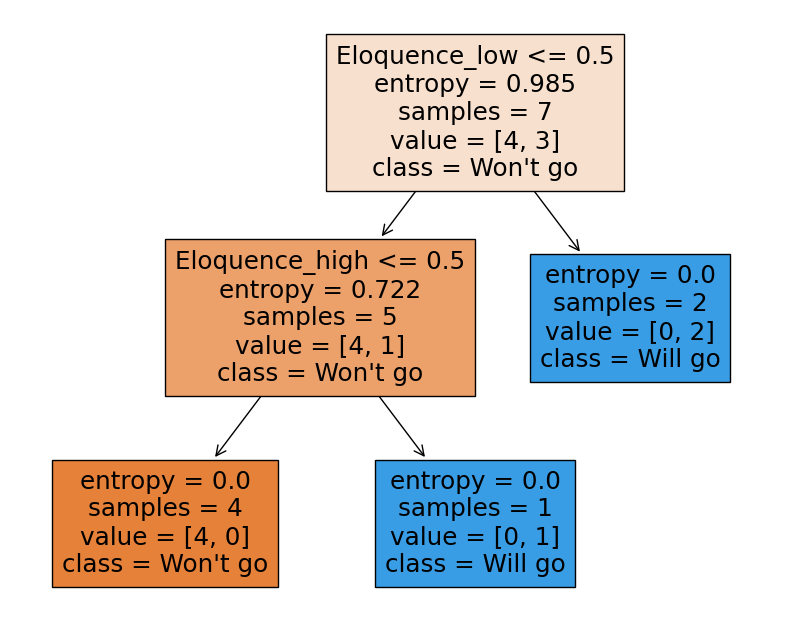

In [37]:
tree.plot_tree(clf, filled=True, feature_names=list(df_train.columns), class_names=["Won't go", "Will go"])

In [6]:
balls = [1 for i in range(8)] + [0 for i in range(5)]

In [20]:
def entropy(balls):
    entropy_value = 0
    for i in set(balls):
        number = balls.count(i)
        entropy_value+= -number/len(balls)*np.log2(number/len(balls)) 
    return(entropy_value) 

In [21]:
entropy(balls)

2.584962500721156